In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## All models are callable, just like layers
You can treat any model as if it were a layer by invoking it on an Input or on the output of another layer. By calling a model you aren't just reusing the architecture of the model, you're also reusing its weights.

To see this in action, here's a different take on the autoencoder example that creates an encoder model, a decoder model, and chains them in two calls to obtain the autoencoder model:

## Encoder

In [2]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

In [3]:
encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

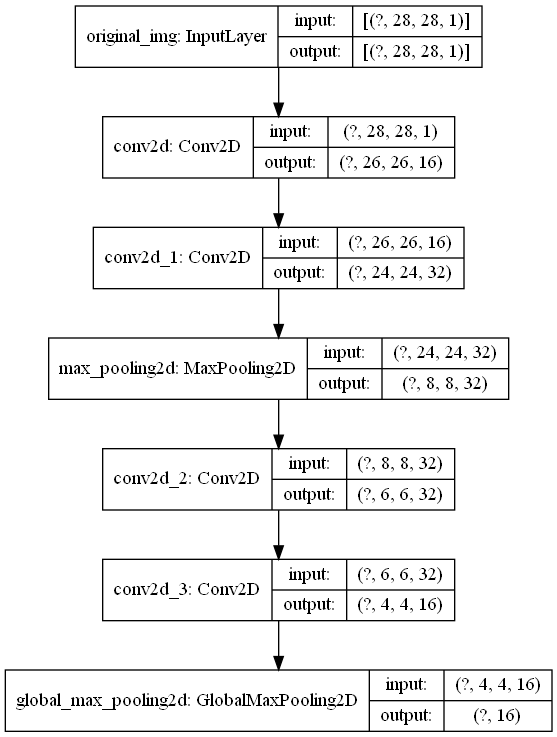

In [4]:
keras.utils.plot_model(encoder,'Encoder_Network.png',show_shapes=True)

## Decoder

In [5]:
decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

In [6]:
decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_img (InputLayer)     [(None, 16)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 6, 6, 16)          160       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 32)          4640      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 26, 26, 16)        4624      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         145 

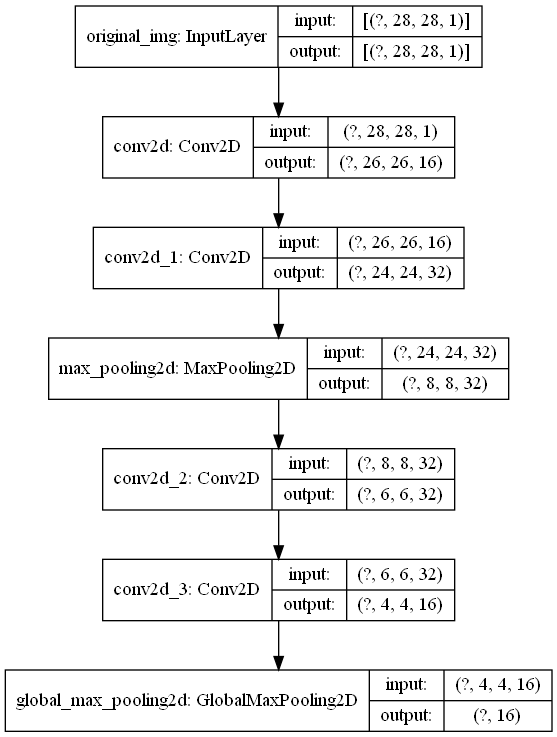

In [7]:
keras.utils.plot_model(encoder,'Decoder_Network.png',show_shapes=True)

## Callable Layers

In [8]:
autoencoder_input=keras.Input(shape=(28,28,1),name='img')

In [9]:
encoded_img=encoder(autoencoder_input)
decoded_img=decoder(encoded_img)

In [10]:
autoencoder=keras.Model(autoencoder_input,decoded_img,name='autoencoder')

In [11]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                18672     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


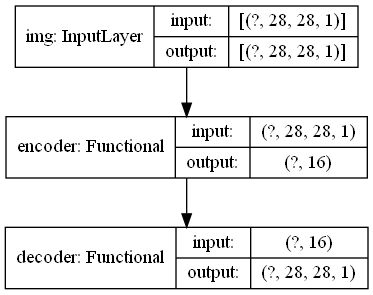

In [12]:
keras.utils.plot_model(autoencoder,'Encoder Decoder.png',show_shapes=True)

the model can be nested: a model can contain sub-models (since a model is just like a layer). A common use case for model nesting is ensembling. For example, here's how to ensemble a set of models into a single model that averages their predictions

In [13]:
def get_model():
    inputs=keras.Input(shape=(128,))
    outputs=layers.Dense(1)(inputs)
    return keras.Model(inputs,outputs)

In [14]:
model1=get_model()
model2=get_model()
model3=get_model()

In [17]:
model1.layers

In [18]:
inputs=keras.Input(shape=(128,))

In [19]:
y1=model1(inputs)
y2=model2(inputs)
y3=model3(inputs)

In [21]:
y1

<tf.Tensor 'functional_1/dense/BiasAdd:0' shape=(None, 1) dtype=float32>

In [22]:
outputs=layers.average([y1,y2,y3])

In [31]:
outputs.get_shape

<bound method Tensor.get_shape of <tf.Tensor 'average/truediv:0' shape=(None, 1) dtype=float32>>

In [26]:
ensemble_model=keras.Model(inputs=inputs,outputs=outputs,name='ensemble model')

In [27]:
ensemble_model.summary()

Model: "ensemble model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
functional_1 (Functional)       (None, 1)            129         input_4[0][0]                    
__________________________________________________________________________________________________
functional_3 (Functional)       (None, 1)            129         input_4[0][0]                    
__________________________________________________________________________________________________
functional_5 (Functional)       (None, 1)            129         input_4[0][0]                    
_____________________________________________________________________________________

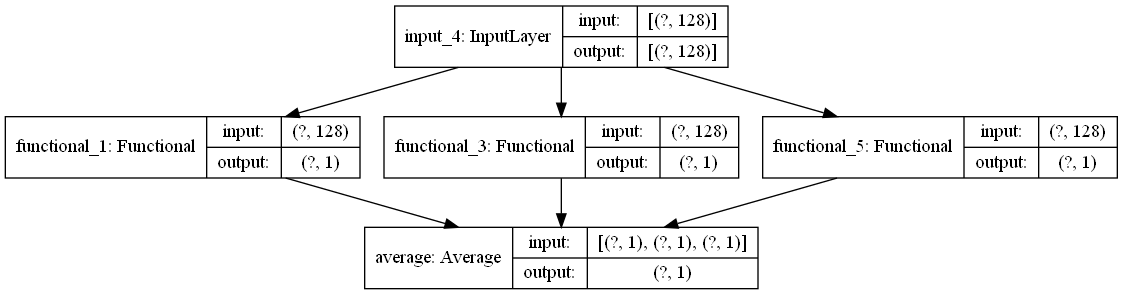

In [29]:
keras.utils.plot_model(ensemble_model,'ensemble_model.png',show_shapes=True)